# Programming Assignment: Бэггинг и случайный лес

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets, metrics
from sklearn import ensemble, tree
from sklearn import model_selection

## Датасет

In [3]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
X = digits.data.copy()
y = digits.target.copy()

## 1. DecisionTreeClassifier

Построим обычное решающее дерево

In [6]:
clf_tree = tree.DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Оценим качество кросс-валидации на нём

In [7]:
scores = model_selection.cross_validate(clf_tree, X, y, cv=10)
cv_score_1 = scores['test_score'].mean()
cv_score_1

0.8297850879856629

In [8]:
with open('answers/rf_task1', 'w') as f:
    f.write(str(cv_score_1))

## 2. BaggingClassifier

Используем Бэггинг над предыдущем деревом

In [9]:
clf = ensemble.BaggingClassifier(base_estimator=clf_tree, 
                                 n_estimators=100)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [10]:
scores = model_selection.cross_validate(clf, X, y, cv=10)
cv_score_2 = scores['test_score'].mean()
cv_score_2

0.92213506026006

In [11]:
with open('answers/rf_task2', 'w') as f:
    f.write(str(cv_score_2))

## 3. BaggingClassifier with q

Построим бэггинг ограничив максимальное число признаков, на которых можно обучаться

In [12]:
clf = ensemble.BaggingClassifier(base_estimator=clf_tree,
                                 n_estimators=100, 
                                 max_features=int(X.shape[1]**0.5))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [13]:
scores = model_selection.cross_validate(clf, X, y, cv=10)
cv_score_3 = scores['test_score'].mean()
cv_score_3

0.9286918934268893

In [14]:
with open('answers/rf_task3', 'w') as f:
    f.write(str(cv_score_3))

## 4. DecisionTreeClussifier with q

Используем ограничение на число признаков для разбиения

In [15]:
clf = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_features="sqrt"), 
                                 n_estimators=100)

In [16]:
scores = model_selection.cross_validate(clf, X, y, cv=10)
cv_score_4 = scores['test_score'].mean()
cv_score_4

0.953362797004268

In [17]:
with open('answers/rf_task4', 'w') as f:
    f.write(str(cv_score_4))

## 5. RandomForest

Исследуем RandomForest

In [19]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=100, max_features="sqrt")
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Сравним RandomForest с полученным ранее Bagging'ом

In [20]:
scores = model_selection.cross_validate(rf_clf, X, y, cv=10)
cv_score_5 = scores['test_score'].mean()
cv_score_5

0.9560590067459988

Как мы видим - результаты почти аналогичны

### Исследуем зависимость качества от количества базовых алгоритмов

In [21]:
score_arr = []
for n in range(10, 300, 10):
    scores = model_selection.cross_validate(ensemble.RandomForestClassifier(n_estimators=n, 
                                                                            random_state=1), 
                                            X, y, cv=5)
    score_arr.append(scores['test_score'].mean())
    print(n)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


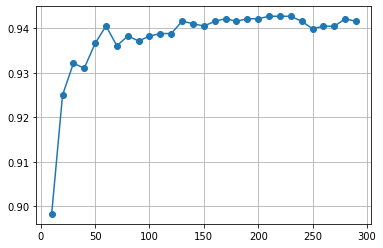

In [22]:
pylab.grid(True)
pylab.plot(range(10, 300, 10), score_arr, '-', marker='o')

Как мы видим качество растёт до некоторго значения (примерно 220) и после этого почти не меняется

### Исследуем зависимость качества от числа признаков в выборке

In [36]:
score_arr = []
for n in range(5, 64, 5):
    scores = model_selection.cross_validate(ensemble.RandomForestClassifier(n_estimators=100, 
                                                                            random_state=1), 
                                            X[:, :n], y, cv=5)
    score_arr.append(scores['test_score'].mean())
    print(n)

5
10
15
20
25
30
35
40
45
50
55
60


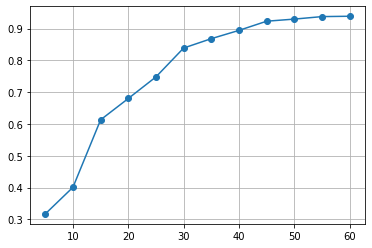

In [24]:
pylab.grid(True)
pylab.plot(range(5, 64, 5), score_arr, '-', marker='o')

Как мы видим, чем больше признаков - тем больше качество

### Исследуем зависимость качества от глубины построения базовых алгоритмов

In [31]:
score_arr = []
for d in range(1, 30, 1):
    scores = model_selection.cross_validate(ensemble.RandomForestClassifier(n_estimators=100, 
                                                                            random_state=1, max_depth=d),
                                            X, y, cv=5)
    score_arr.append(scores['test_score'].mean())
    print(d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


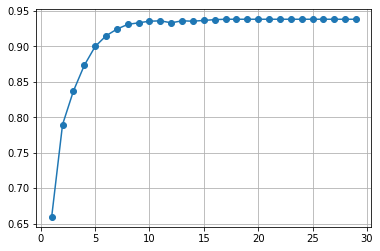

In [32]:
pylab.grid(True)
pylab.plot(range(1, 30, 1), score_arr, '-', marker='o')

Как мы видим, качество улучшается и при некоторой глубине (примерно 10) перестаёт менятся.

In [37]:
with open('answers/rf_task5', 'w') as f:
    f.write("2 3 4 7")